<a href="https://colab.research.google.com/github/ifaran1106/Test_Projects/blob/main/Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
class Model(nn.Module):
  def __init__(self, in_f=4, h1=8, h2=9, out_f=3):
    super().__init__()
    self.fc1=nn.Linear(in_f, h1)
    self.fc2=nn.Linear(h1, h2)
    self.fc3=nn.Linear(h2, out_f)

  def forward (self, x):
     x=F.relu(self.fc1(x))
     x=F.relu(self.fc2(x))
     x=self.fc3(x)
     return x

In [39]:
model = Model()

In [40]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [41]:
my_df['variety']=my_df['variety'].replace('Setosa', 0.0)
my_df['variety']=my_df['variety'].replace('Versicolor', 1.0)
my_df['variety']=my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-41-23ca21c46563>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [42]:
X=my_df.drop('variety', axis=1)
y=my_df['variety']

In [43]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
y

,variety
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [45]:
X=X.values
y=y.values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [47]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [48]:
criterion=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses=[]
epoch = 5000

for i in range(epoch):
  y_pred=model.forward(X_train)
  loss=criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 1000 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1854727268218994
Epoch: 1000 and loss: 0.06388100981712341
Epoch: 2000 and loss: 0.05013096705079079
Epoch: 3000 and loss: 0.04570571705698967
Epoch: 4000 and loss: 0.04481351748108864


Text(0, 0.5, 'Loss')

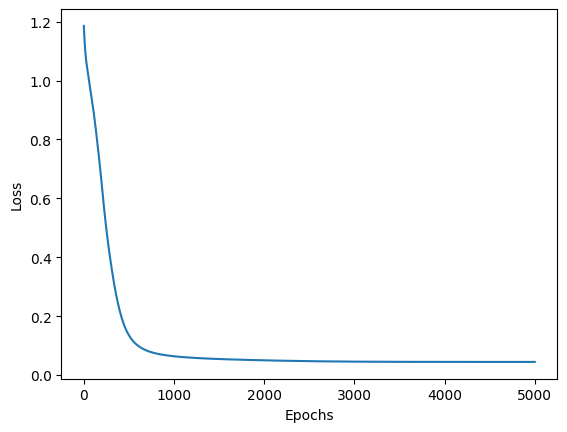

In [49]:
plt.plot(range(epoch), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [50]:
with torch.no_grad():
  y_val=model.forward(X_test)
  loss=criterion(y_val, y_test)
  print(loss)

tensor(0.0234)


In [51]:
correct=0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model.forward(data)
    print(f'{i+1} {str(y_val)}   \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item()==y_test[i]:
      correct=correct+1
      print(f'{correct} correct')

1 tensor([-1.7420, 10.6540,  2.0412])   	 1 	 1
1 correct
2 tensor([ 20.9631,  10.0249, -17.0942])   	 0 	 0
2 correct
3 tensor([ 19.9398,  10.7402, -16.5018])   	 0 	 0
3 correct
4 tensor([-3.1949, 10.4477,  3.8900])   	 1 	 1
4 correct
5 tensor([-8.0823,  6.8928, 10.3080])   	 2 	 2
5 correct
6 tensor([-11.8725,   6.7233,  15.1620])   	 2 	 2
6 correct
7 tensor([ 18.3792,  11.0074, -15.4094])   	 0 	 0
7 correct
8 tensor([ 21.0961,  10.5083, -17.3514])   	 0 	 0
8 correct
9 tensor([-2.1451, 10.8290,  2.5247])   	 1 	 1
9 correct
10 tensor([ 21.3627,  10.7003, -17.5016])   	 0 	 0
10 correct
11 tensor([-3.2417, 10.8696,  3.9639])   	 1 	 1
11 correct
12 tensor([-11.7980,   4.4295,  15.0738])   	 2 	 2
12 correct
13 tensor([ 2.5220, 12.3398, -3.4849])   	 1 	 1
13 correct
14 tensor([ 2.3126, 13.5415, -3.2209])   	 1 	 1
14 correct
15 tensor([-9.5240,  6.1355, 12.1009])   	 2 	 2
15 correct
16 tensor([-10.5985,   4.2460,  13.5177])   	 2 	 2
16 correct
17 tensor([-2.8059,  9.8067,  3.40

In [73]:
sepal_length=float(input('sepal length: '))
sepal_width=float(input('sepal width: '))
petal_length=float(input('petal length: '))
petal_width=float(input('petal width: '))
iris=torch.tensor([sepal_length, sepal_width, petal_length, petal_width])
iris=iris.unsqueeze(0)
print(f'iris demensions:{iris}')

with torch.no_grad():
  new_data=model.forward(iris)
  print(f'output: {new_data}')
  print(f'final output: {new_data.argmax().item()}')

  if new_data.argmax().item()==0:
    print('Sertosa')
  if new_data.argmax().item()==1:
    print('Versicolor')
  if new_data.argmax().item()==2:
    print('Virginica')

sepal length: 2.2
sepal width: 0.6
petal length: 3.4
petal width: 0.2
iris demensions:tensor([[2.2000, 0.6000, 3.4000, 0.2000]])
output: tensor([[ 3.5517,  9.4172, -4.4462]])
final output: 1
Versicolor
